In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_raw = pd.read_csv('../artifacts/movie.csv')

In [3]:
data_raw.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
##Data Preprocessing

In [5]:
data_raw.shape

(40000, 2)

In [6]:
data_raw.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
39995    False
39996    False
39997    False
39998    False
39999    False
Length: 40000, dtype: bool

In [7]:
data_raw.duplicated().sum()

np.int64(277)

In [10]:
# Remove duplicate rows and keep only the first occurrence
data = data_raw.drop_duplicates()

In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data.isnull()

,text,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
39995,False,False
39996,False,False
39997,False,False
39998,False,False


In [13]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [14]:
#Text preprocessing

In [15]:
import re   #regular expression
import string

In [16]:
data["text"].head(5)

0    I grew up (b. 1965) watching and loving the Th...
1    When I put this movie in my DVD player, and sa...
2    Why do people who do not know what a particula...
3    Even though I have great interest in Biblical ...
4    Im a die hard Dads Army fan and nothing will e...
Name: text, dtype: object

In [17]:
#uppercase to lower case

In [18]:
data["text"] = data["text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

C:\Users\anuja\AppData\Local\Temp\ipykernel_15604\2054086580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["text"] = data["text"].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [19]:
data["text"].head(5)

0    i grew up (b. 1965) watching and loving the th...
1    when i put this movie in my dvd player, and sa...
2    why do people who do not know what a particula...
3    even though i have great interest in biblical ...
4    im a die hard dads army fan and nothing will e...
Name: text, dtype: object

In [20]:
#remove links

In [21]:
data["text"] = data['text'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

C:\Users\anuja\AppData\Local\Temp\ipykernel_15604\1746344332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["text"] = data['text'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))


In [22]:
data["text"].head(5)

0    i grew up (b. 1965) watching and loving the th...
1    when i put this movie in my dvd player, and sa...
2    why do people who do not know what a particula...
3    even though i have great interest in biblical ...
4    im a die hard dads army fan and nothing will e...
Name: text, dtype: object

In [23]:
#remove punctuation

In [24]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["text"] = data["text"].apply(remove_punctuations)

C:\Users\anuja\AppData\Local\Temp\ipykernel_15604\179781057.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["text"] = data["text"].apply(remove_punctuations)


In [26]:
data["text"].head(5)

0    i grew up b 1965 watching and loving the thund...
1    when i put this movie in my dvd player and sat...
2    why do people who do not know what a particula...
3    even though i have great interest in biblical ...
4    im a die hard dads army fan and nothing will e...
Name: text, dtype: object

In [27]:
#remove numbers

In [28]:
data["text"] = data['text'].str.replace(r'\d+', '', regex=True)

C:\Users\anuja\AppData\Local\Temp\ipykernel_15604\549046709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["text"] = data['text'].str.replace(r'\d+', '', regex=True)


In [29]:
data["text"].head(5)

0    i grew up b  watching and loving the thunderbi...
1    when i put this movie in my dvd player and sat...
2    why do people who do not know what a particula...
3    even though i have great interest in biblical ...
4    im a die hard dads army fan and nothing will e...
Name: text, dtype: object

In [30]:
#remove stop words

In [42]:
!pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached regex-2024.9.11-cp312-cp312-win_amd64.whl.metadata (41 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.9.11-cp312-cp312-win_amd64.whl (273 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)


In [31]:
import nltk

In [32]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [33]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [34]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
data["text"] = data["text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

C:\Users\anuja\AppData\Local\Temp\ipykernel_15604\3233826974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["text"] = data["text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))


In [36]:
data["text"].head()

0    grew b watching loving thunderbirds mates scho...
1    put movie dvd player sat coke chips expectatio...
2    people know particular time past like feel nee...
3    even though great interest biblical movies bor...
4    im die hard dads army fan nothing ever change ...
Name: text, dtype: object

In [37]:
#stemming

In [38]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [39]:
data["text"] = data["text"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

C:\Users\anuja\AppData\Local\Temp\ipykernel_15604\476065267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["text"] = data["text"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))


In [40]:
data["text"].head()

0    grew b watch love thunderbird mate school watc...
1    put movi dvd player sat coke chip expect hope ...
2    peopl know particular time past like feel need...
3    even though great interest biblic movi bore de...
4    im die hard dad armi fan noth ever chang got t...
Name: text, dtype: object

In [41]:
#building vocabulary

In [42]:
from collections import Counter
vocab = Counter()

In [43]:
vocab

Counter()

In [44]:
for sentence in data['text']:
    vocab.update(sentence.split())

In [45]:
vocab

Counter({'br': 91358,
         'movi': 78855,
         'film': 73237,
         'one': 42427,
         'like': 35087,
         'time': 23717,
         'good': 23187,
         'make': 22840,
         'get': 22152,
         'see': 22021,
         'charact': 21999,
         'watch': 21655,
         'even': 19949,
         'stori': 19294,
         'would': 19079,
         'realli': 18332,
         'scene': 16430,
         'look': 15446,
         'show': 15367,
         'well': 15358,
         'much': 15050,
         'end': 14498,
         'peopl': 14355,
         'also': 14343,
         'great': 14330,
         'love': 14227,
         'go': 14161,
         'bad': 14076,
         'think': 13763,
         'play': 13541,
         'first': 13527,
         'dont': 13428,
         'act': 13392,
         'way': 13156,
         'thing': 12882,
         'made': 12125,
         'could': 12064,
         'know': 11863,
         'say': 11711,
         'seem': 11308,
         'mani': 10604,
         'wor

In [46]:
len(vocab)

121391

In [47]:
data.shape

(39723, 2)

In [48]:
tokens = [key for key in vocab if vocab[key] > 100]

In [49]:
len(tokens)

4726

In [50]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

In [51]:
#divide data set

In [52]:
X = data['text']
y = data['label']

In [53]:
X

0        grew b watch love thunderbird mate school watc...
1        put movi dvd player sat coke chip expect hope ...
2        peopl know particular time past like feel need...
3        even though great interest biblic movi bore de...
4        im die hard dad armi fan noth ever chang got t...
                               ...                        
39995    western union someth forgotten classic western...
39996    movi incred piec work explor everi nook cranni...
39997    wife watch movi plan visit sicili stromboli so...
39998    first watch flatlin amaz necessari featur good...
39999    would film good gross estim award nomin john t...
Name: text, Length: 39723, dtype: object

In [54]:
y

0        0
1        0
2        0
3        0
4        1
        ..
39995    1
39996    1
39997    0
39998    1
39999    1
Name: label, Length: 39723, dtype: int64

In [55]:
!pip install scikit-learn

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
X_train

33774    read hole th grade heard movi ecstat cours bus...
29342    film shot movi flat rout near lone pine califo...
8648     first movi joan crawford clark gabl made toget...
17798    fey stori martian attempt colon earth thing mu...
37810    surprisingli underr movi realist authent great...
                               ...                        
21616    movi call gaynigg outer space could go wrong t...
35398    william shakespear play classifi comedi traged...
22955    worst movi ive ever attempt watch first minut ...
26883    final caught starlight last night televis say ...
20496    read novel cant tell faith film stori typic my...
Name: text, Length: 31778, dtype: object

In [58]:
X_test

24773    need movi plain simpl origin although hate som...
32634    remak origin assault mind assault carpent true...
21428    film special effect time impress easili explai...
39085    fan marlen dietrich film anxiou see documentar...
5026     irish origin love movi guy hot funni also sinc...
                               ...                        
5511     ok bought xma ago brother law took see get sho...
33920    tigerland fourbr br blake frenchbr br througho...
38923    rent one true thing night learn respect famili...
19549    act awkward creepi good wayat write dialogu ch...
30379    although director triedth film made tynisia mo...
Name: text, Length: 7945, dtype: object

In [59]:
y_train

33774    1
29342    1
8648     1
17798    1
37810    1
        ..
21616    0
35398    1
22955    0
26883    0
20496    0
Name: label, Length: 31778, dtype: int64

In [60]:
y_test

24773    0
32634    0
21428    1
39085    0
5026     1
        ..
5511     0
33920    1
38923    1
19549    0
30379    0
Name: label, Length: 7945, dtype: int64

In [61]:
#vectorization

In [62]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [63]:
vectorized_x_train = vectorizer(X_train, tokens)

In [64]:
vectorized_x_test = vectorizer(X_test, tokens)

In [65]:
vectorized_x_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [66]:
y_train

33774    1
29342    1
8648     1
17798    1
37810    1
        ..
21616    0
35398    1
22955    0
26883    0
20496    0
Name: label, Length: 31778, dtype: int64

In [67]:
vectorized_x_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [68]:
y_test

24773    0
32634    0
21428    1
39085    0
5026     1
        ..
5511     0
33920    1
38923    1
19549    0
30379    0
Name: label, Length: 7945, dtype: int64

In [69]:
y_train.value_counts()

label
1    15929
0    15849
Name: count, dtype: int64

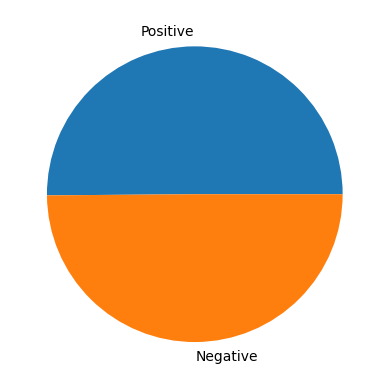

In [70]:
plt.pie(np.array([y_train.value_counts()[1], y_train.value_counts()[0]]), labels=['Positive', 'Negative'])
plt.show()

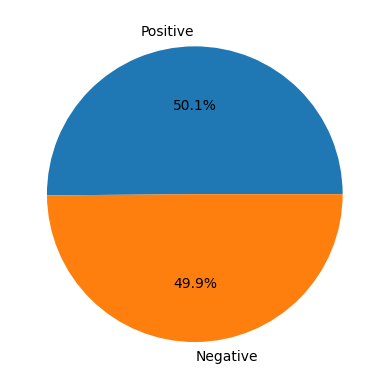

In [71]:
# Define the data and labels
labels = ['Positive', 'Negative']
sizes = np.array([y_train.value_counts()[1], y_train.value_counts()[0]])

# Create the pie chart with percentage display
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Display the plot
plt.show()


In [72]:
#handle imbalance data set

In [73]:
!pip install imbalanced-learn

In [74]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(31858, 4726) (31858,)


In [75]:
y_train_smote.value_counts()

label
1    15929
0    15929
Name: count, dtype: int64

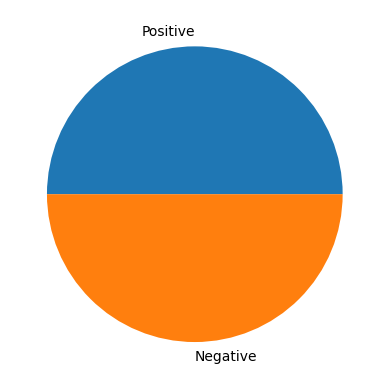

In [76]:
plt.pie(np.array([y_train_smote.value_counts()[1], y_train_smote.value_counts()[0]]), labels=['Positive', 'Negative'])
plt.show()

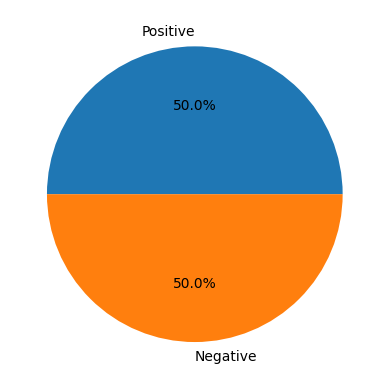

In [77]:
# Define the data and labels
labels = ['Positive', 'Negative']
sizes = np.array([y_train_smote.value_counts()[1], y_train_smote.value_counts()[0]])

# Create the pie chart with percentage display
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Display the plot
plt.show()


In [78]:
vectorized_x_train_smote

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [79]:
y_train_smote

0        1
1        1
2        1
3        1
4        1
        ..
31853    0
31854    0
31855    0
31856    0
31857    0
Name: label, Length: 31858, dtype: int64

In [80]:
vectorized_x_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [81]:
y_test

24773    0
32634    0
21428    1
39085    0
5026     1
        ..
5511     0
33920    1
38923    1
19549    0
30379    0
Name: label, Length: 7945, dtype: int64

In [82]:
#model trainning and evaluation

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [84]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [85]:
#logistic regression

In [86]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.936
	Precision = 0.933
	Recall = 0.94
	F1-Score = 0.936
Testing Scores:
	Accuracy = 0.863
	Precision = 0.86
	Recall = 0.868
	F1-Score = 0.864


In [87]:
#naive bayes

In [88]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.854
	Precision = 0.859
	Recall = 0.845
	F1-Score = 0.852
Testing Scores:
	Accuracy = 0.846
	Precision = 0.848
	Recall = 0.844
	F1-Score = 0.846


In [89]:
#decision tree

In [90]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.704
	Precision = 0.705
	Recall = 0.704
	F1-Score = 0.704


In [91]:
#random forest

In [ ]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

In [ ]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)